In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(400, 2)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train.shape

(320, 2)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#batch GD batch size = no rows count (320,2)
#Which is faster term of same number of epochs => Batch
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 [==============================] - 0s 460ms/step - loss: 72493.3984 - accuracy: 0.3469
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 71441.9766 - accuracy: 0.3469
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 70688.6641 - accuracy: 0.3469
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 70063.4844 - accuracy: 0.3469
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 69512.5625 - accuracy: 0.3469
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 69010.9375 - accuracy: 0.3469
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 68544.7266 - accuracy: 0.3469
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 68105.2734 - accuracy: 0.3469
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 67686.8281 - accuracy: 0.3469
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 67285.2969 - accuracy: 

In [19]:
#Stochastic GD batch_size = 1 --> 1 batch for every one row
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 [==============================] - 1s 2ms/step - loss: 36904.2266 - accuracy: 0.3469
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 5914.7666 - accuracy: 0.3469
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 147.2915 - accuracy: 0.4563
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 3.5712 - accuracy: 0.5219
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.6500
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6752 - accuracy: 0.6500
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6719 - accuracy: 0.6531
Epoch 8/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6670 - accuracy: 0.6531
Epoch 9/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6631 - accuracy: 0.6531
Epoch 10/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6600 - accurac

In [21]:
#batch GD batch size = no rows count (400,2)
#Which is faster to conver term of same number of epochs => Stochastric
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=400,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.2952 - accuracy: 0.8188 - val_loss: 0.3350 - val_accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2937 - accuracy: 0.8188 - val_loss: 0.3344 - val_accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2925 - accuracy: 0.8219 - val_loss: 0.3326 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2916 - accuracy: 0.8219 - val_loss: 0.3323 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.2907 - accuracy: 0.8219 - val_loss: 0.3308 - val_accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2900 - accuracy: 0.8219 - val_loss: 0.3306 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2893 - accuracy: 0.8219 - val_loss: 0.3294 - val_accuracy: 0.8000
Epoch 8/10
1/1 [=============

In [22]:
#Stochastric GD batch_size = 1 batch for every one row (400,2)
#Which is faster to conver term of same number of epochs => Stochastric
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2796 - accuracy: 0.8313 - val_loss: 0.2560 - val_accuracy: 0.8875
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.8938 - val_loss: 0.2336 - val_accuracy: 0.9375
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.8844 - val_loss: 0.2046 - val_accuracy: 0.9500
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.8875 - val_loss: 0.1909 - val_accuracy: 0.9500
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2651 - accuracy: 0.8969 - val_loss: 0.1919 - val_accuracy: 0.9500
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.9000 - val_loss: 0.1892 - val_accuracy: 0.9500
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2572 - accuracy: 0.8938 - val_loss: 0.1790 - val_accuracy: 0.9500
Epoch 

In [28]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
320/320 [==============================] - 1s 2ms/step - loss: 0.4781 - accuracy: 0.8031 - val_loss: 0.5976 - val_accuracy: 0.7250
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.8438 - val_loss: 0.4906 - val_accuracy: 0.7750
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.8375 - val_loss: 0.4183 - val_accuracy: 0.8125
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.8375 - val_loss: 0.3863 - val_accuracy: 0.8250
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2962 - accuracy: 0.8500 - val_loss: 0.3434 - val_accuracy: 0.8875
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8594 - val_loss: 0.3143 - val_accuracy: 0.9125
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.8687 - val_loss: 0.2911 - val_accuracy: 0.9125
Epoch 

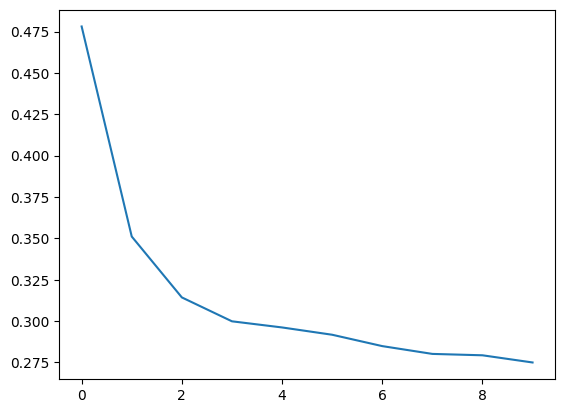

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [25]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=400,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6703 - accuracy: 0.6219 - val_loss: 0.6763 - val_accuracy: 0.5250
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 0.6611 - accuracy: 0.6562 - val_loss: 0.6748 - val_accuracy: 0.5125
Epoch 3/10
1/1 [==============================] - 0s 64ms/step - loss: 0.6545 - accuracy: 0.6812 - val_loss: 0.6733 - val_accuracy: 0.5500
Epoch 4/10
1/1 [==============================] - 0s 68ms/step - loss: 0.6491 - accuracy: 0.7031 - val_loss: 0.6720 - val_accuracy: 0.5750
Epoch 5/10
1/1 [==============================] - 0s 64ms/step - loss: 0.6443 - accuracy: 0.7094 - val_loss: 0.6707 - val_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 68ms/step - loss: 0.6399 - accuracy: 0.7188 - val_loss: 0.6693 - val_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 67ms/step - loss: 0.6358 - accuracy: 0.7219 - val_loss: 0.6678 - val_accuracy: 0.6125
Epoch 8/10
1/1 [=============

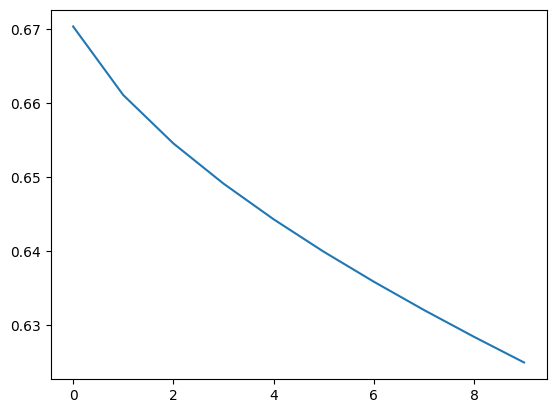

In [27]:
plt.plot(history.history['loss'])

In [30]:
#Minibatch
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=150,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
3/3 [==============================] - 1s 166ms/step - loss: 0.2688 - accuracy: 0.8781 - val_loss: 0.2443 - val_accuracy: 0.9625
Epoch 2/10
3/3 [==============================] - 0s 52ms/step - loss: 0.2661 - accuracy: 0.8719 - val_loss: 0.2480 - val_accuracy: 0.9625
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 0.2646 - accuracy: 0.8750 - val_loss: 0.2454 - val_accuracy: 0.9625
Epoch 4/10
3/3 [==============================] - 0s 34ms/step - loss: 0.2635 - accuracy: 0.8813 - val_loss: 0.2446 - val_accuracy: 0.9625
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 0.2627 - accuracy: 0.8813 - val_loss: 0.2430 - val_accuracy: 0.9625
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 0.2618 - accuracy: 0.8781 - val_loss: 0.2454 - val_accuracy: 0.9625
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 0.2607 - accuracy: 0.8813 - val_loss: 0.2457 - val_accuracy: 0.9625
Epoch 8/10
3/3 [==========

In [31]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=200,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 618ms/step - loss: 0.2587 - accuracy: 0.8844 - val_loss: 0.2486 - val_accuracy: 0.9750
Epoch 2/10
2/2 [==============================] - 0s 147ms/step - loss: 0.2566 - accuracy: 0.8844 - val_loss: 0.2488 - val_accuracy: 0.9750
Epoch 3/10
2/2 [==============================] - 0s 101ms/step - loss: 0.2559 - accuracy: 0.8875 - val_loss: 0.2487 - val_accuracy: 0.9750
Epoch 4/10
2/2 [==============================] - 0s 40ms/step - loss: 0.2548 - accuracy: 0.8844 - val_loss: 0.2478 - val_accuracy: 0.9750
Epoch 5/10
2/2 [==============================] - 0s 41ms/step - loss: 0.2544 - accuracy: 0.8844 - val_loss: 0.2484 - val_accuracy: 0.9750
Epoch 6/10
2/2 [==============================] - 0s 57ms/step - loss: 0.2541 - accuracy: 0.8844 - val_loss: 0.2486 - val_accuracy: 0.9750
Epoch 7/10
2/2 [==============================] - 0s 44ms/step - loss: 0.2536 - accuracy: 0.8813 - val_loss: 0.2494 - val_accuracy: 0.9750
Epoch 8/10
2/2 [========